In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from PIL import Image
import urllib.request as urllib2
from textwrap import wrap

In [2]:
books = pd.read_csv('BX-CSV-Dump/BX-Books.csv', sep = ';', error_bad_lines = False, encoding = 'latin-1')
users = pd.read_csv('BX-CSV-Dump/BX-Users.csv', sep = ';', error_bad_lines = False, encoding = 'latin-1')
ratings = pd.read_csv('BX-CSV-Dump/BX-Book-Ratings.csv', sep = ';', error_bad_lines = False, encoding = 'latin-1')

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/home/lacho/.local/lib/python3.8/site-packages/IPython/core/interactiveshe

In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
users = users.fillna(0)
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",0.0
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",0.0
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",0.0


In [5]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
ratings['Book-Rating'].describe()

count    1.149780e+06
mean     2.866950e+00
std      3.854184e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.000000e+00
max      1.000000e+01
Name: Book-Rating, dtype: float64

In [7]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


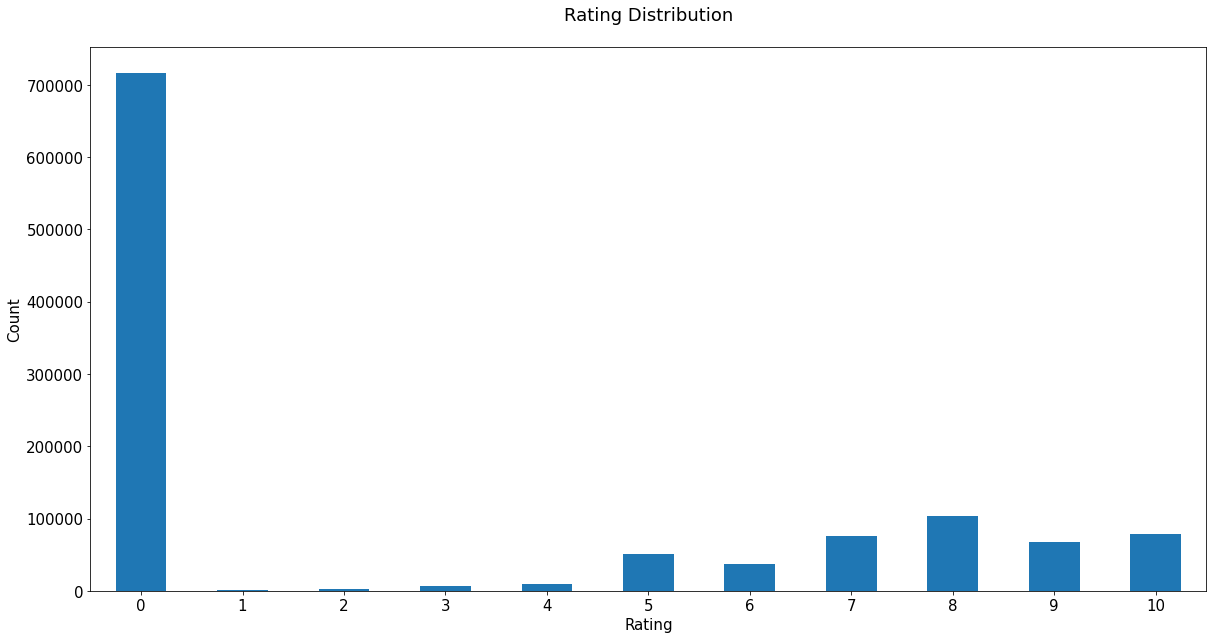

In [8]:
plt.figure(figsize=(20,10))
plt.rc('font', size = 15)
ratings['Book-Rating'].value_counts(sort = False).plot(kind = 'bar')
plt.title('Rating Distribution\n')
plt.xticks(rotation = 0, horizontalalignment = 'center')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('rating_distr.png')

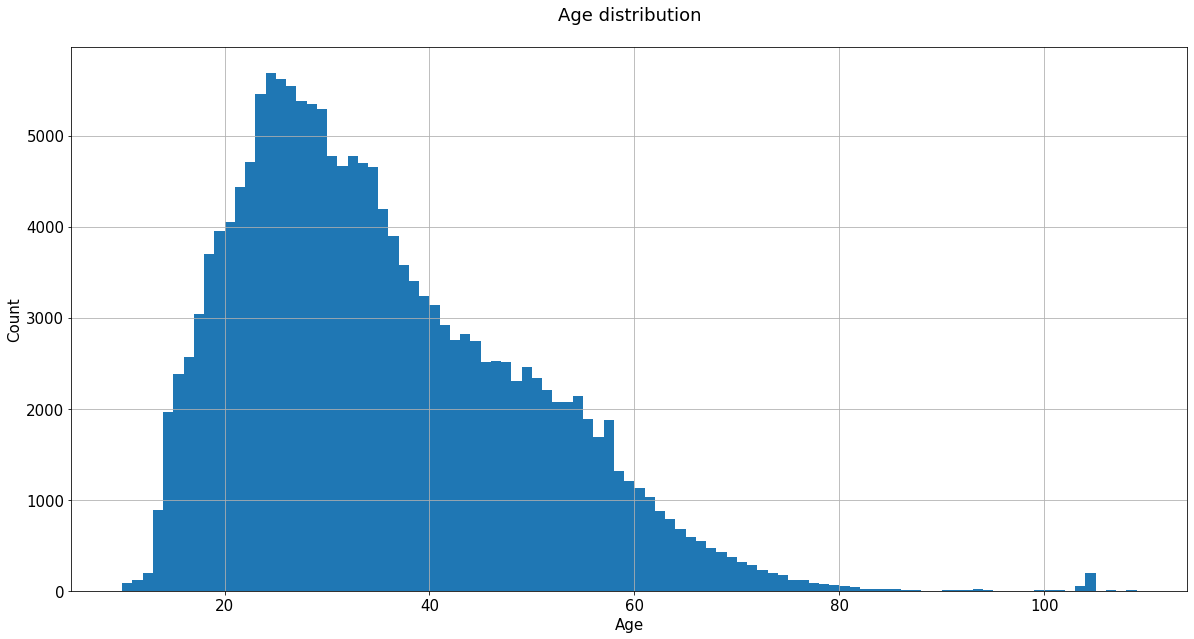

In [9]:
plt.figure(figsize = (20,10))
plt.rc('font', size = 15)
users['Age'].hist(bins=range(10, 110))
plt.title('Age distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('age_distr.png')

In [10]:
book_with_rating = pd.merge(ratings, books, on = 'ISBN')
columns = ['Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']
book_with_rating = book_with_rating.drop(columns, axis = 1)
book_with_rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,2313,034545104X,5
2,6543,034545104X,0
3,8680,034545104X,5
4,10314,034545104X,9


In [11]:
book_with_rating = book_with_rating.dropna(axis = 0, subset = ['ISBN'])
book_rating_count = (book_with_rating.groupby(by = ['ISBN'])['Book-Rating']
                     .count()
                     .reset_index()
                     .rename(columns = {'Book-Rating': 'Rating_Count'}))

book_rating_count.head()

,ISBN,Rating_Count
0,0000913154,1
1,0001010565,2
2,0001046438,1
3,0001046713,1
4,000104687X,1


In [12]:
print(book_rating_count['Rating_Count'].describe())

count    270151.000000
mean          3.816888
std          13.811690
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max        2502.000000
Name: Rating_Count, dtype: float64


In [13]:
print(book_rating_count['Rating_Count'].quantile(np.arange(0.9, 1, 0.01)))

0.90     7.0
0.91     7.0
0.92     8.0
0.93     9.0
0.94    10.0
0.95    12.0
0.96    14.0
0.97    18.0
0.98    25.0
0.99    42.0
Name: Rating_Count, dtype: float64


In [14]:
popular_books = book_rating_count.query('Rating_Count >= 18')
popular_books.head()

,ISBN,Rating_Count
370,0002558122,19
803,000649840X,89
880,0006547834,39
894,0006550576,24
896,0006550789,30


In [15]:
popular_books.shape

(8283, 2)

In [16]:
popular_books_rating = popular_books.merge(book_with_rating, on = 'ISBN')
popular_books_rating.head()
popular_books_rating.shape

(404478, 4)

In [17]:
combined = popular_books_rating.merge(users, on = 'User-ID', how = 'left')
combined.head()

,ISBN,Rating_Count,User-ID,Book-Rating,Location,Age
0,0002558122,19,278474,0,"croydon, new south wales, australia",40.0
1,0002558122,19,11676,8,"n/a, n/a, n/a",0.0
2,0002558122,19,27782,0,"dandenong north, victoria, australia",53.0
3,0002558122,19,59616,0,"port melbourne, victoria, australia",0.0
4,0002558122,19,71837,10,"middle beach, south australia, australia",60.0


In [18]:
popular_books_germany = combined.loc[
    (combined['Age'] >= 18) 
    & (combined['Age'] < 40) 
    & (combined['Location'].str.contains("germany"))
]

popular_books_germany = popular_books_germany.drop('Location', axis = 1)
popular_books_germany = popular_books_germany.drop_duplicates(['User-ID', 'ISBN'])
popular_books_germany.head()

,ISBN,Rating_Count,User-ID,Book-Rating,Age
130,0006547834,39,182589,0,35.0
410,0020198906,44,9571,0,27.0
568,0020418809,29,54218,0,27.0
1820,0060008032,104,247176,9,33.0
1989,0060011912,22,140879,0,36.0


In [19]:
popular_books_germany.shape

(3110, 5)

In [20]:
reviews_matrix = popular_books_germany.pivot(index = 'User-ID', columns = 'ISBN', values = 'Book-Rating').fillna(0)
reviews_matrix.head()

ISBN,0006547834,0020198906,0020418809,0060008032,0060011912,0060080841,006008460X,0060085444,0060086246,0060090367,...,3596259924,3596282225,3746614007,8472236552,8806142100,8806143042,880781210X,8817106100,8817106259,8845205118
User-ID,,,,,,,,,,,,,,,,,,,,,
242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


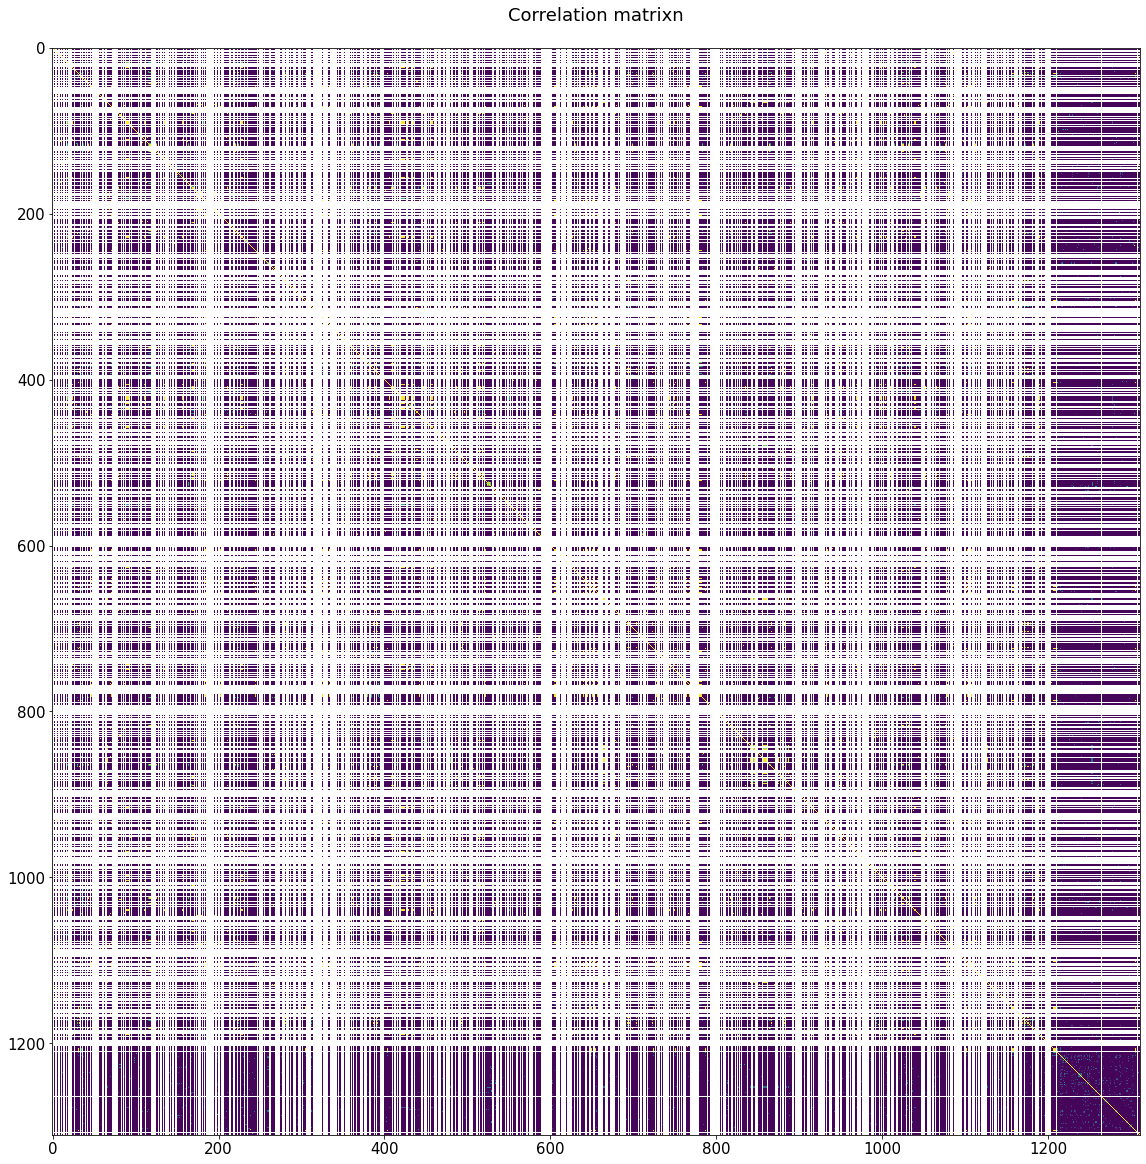

In [21]:
plt.figure(figsize=(20,20))
plt.imshow(reviews_matrix.corr(),interpolation='nearest')
plt.rc("font", size = 15)
plt.title('Correlation matrixn\n')
plt.savefig('corr_matrix.png')
plt.show()

In [22]:
def SVD(data, book, k = 10, n = 50):  
    R = reviews_matrix.to_numpy()
    normalised_mat = R - np.asarray([(np.mean(R, 1))]).T
    #A = normalised_mat / np.sqrt(R.shape[0] - 1)
    A = normalised_mat
    U, s, Vh = np.linalg.svd(A)
    
    book_index = data.columns.get_loc(book)
    features = Vh.T[:, :n]
    input_row = features[book_index]
    
    arr = []
    for i, f in enumerate(features):
        if (i != book_index):
            arr.append(np.corrcoef(input_row, f)[0, 1])
            
    sorted_arr = np.array(arr).argsort()[: k]
    recommended = []
    for i in sorted_arr:
        recommended.append(data.columns[i])
        
    return recommended

In [23]:
def findCosinus(pair):
    nom = 0.0
    denom = 0.0
    i = 0
    j = 0
    vec1 = pair[0]
    vec2 = pair[1]
    vec1Square = list(map(lambda x: x ** 2, vec1))
    vec2Square = list(map(lambda x: x ** 2, vec2))

    while i < len(vec1) and j < len(vec2) :
        nom += (vec1[i] * vec2[j])
        i += 1
        j += 1


    denom = math.sqrt(sum(vec1Square)) * math.sqrt(sum(vec2Square))

    if denom == 0:
        return 0

    return nom / denom

In [24]:
def findKNN(data, book_isbn, k):
    num_of_cols = data.shape[1]
    res = [] * num_of_cols

    matrix_row = data[book_isbn].tolist()

    for column in data:
        if column != book_isbn:
            matrix_curr_row = data[column].tolist()
            res.append((matrix_curr_row, matrix_row, column))


    res.sort(key=findCosinus, reverse = True)
    res = list(map(lambda x: x[2], res))
    
    return res[:k]

In [25]:
def print_recommendation(data, books, title):
    fig, ax = plt.subplots(nrows = 1, ncols = len(books), figsize = (20, 5))
    plt.rc("font", size = 15)
    for i, b in enumerate(books):
        book = data[data['ISBN'] == b].iloc[0]
        ax[i].set_title("\n".join(wrap(book['Book-Title'], 20)), ha='center', size=20)
        ax[i].imshow(Image.open(urllib2.urlopen(book['Image-URL-L'])))
        ax[i].axis('off')
    fig.subplots_adjust(wspace=0.5)  
    fig.suptitle('Recommendation using ' + title, ha='center', size=20)
    fig.subplots_adjust(top = 1)
    fig.tight_layout()
    plt.show()
    fig.savefig(title + '.png')

In [26]:
test_isbn = popular_books_germany.sample()['ISBN'].iloc[0]
recommendation_knn = findKNN(reviews_matrix, test_isbn, 5)
recommendation_svd = SVD(reviews_matrix, test_isbn, k = 5, n = 120)

Recommendation based on book: Wild Animus


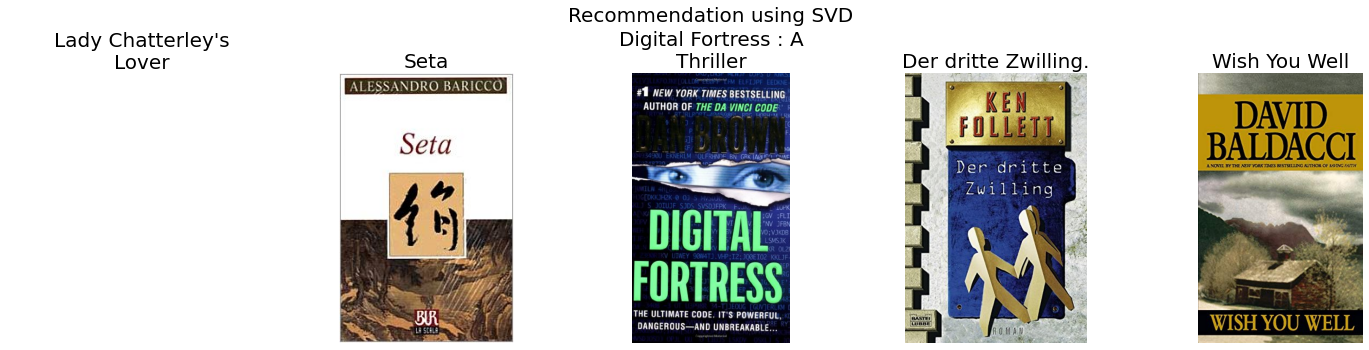

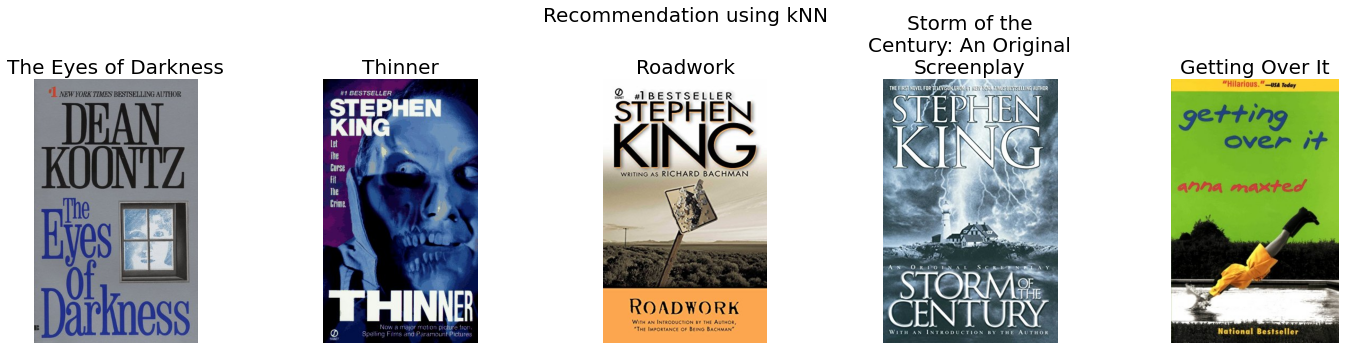

In [27]:
print('Recommendation based on book: ' + books[books['ISBN'] == test_isbn]['Book-Title'].iloc[0])
print_recommendation(books, recommendation_svd, 'SVD')
print_recommendation(books, recommendation_knn, 'kNN')